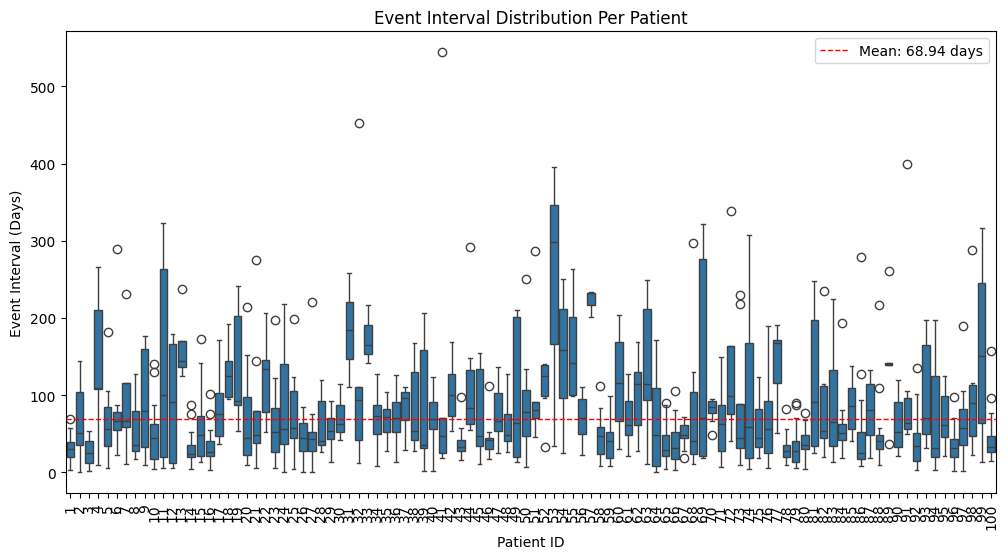

Callable functions produce the same results as Jupyter Notebook.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")  # Convert to datetime safely
    df = df.dropna(subset=["DATE"])  # Drop invalid dates
    return df.sort_values(by=["PATIENT_ID", "DATE"])

# Compute event intervals
def compute_event_intervals(df):
    df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift()
    df["event_interval"] = (df["DATE"] - df["prev_DATE"]).dt.days
    return df.dropna(subset=["event_interval"])  # Drop NaN values

# Boxplot visualization function
def plot_event_intervals(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="PATIENT_ID", y="event_interval", data=df, whis=1.5)
    
    mean_interval = df["event_interval"].mean()
    plt.axhline(y=mean_interval, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_interval:.2f} days")
    
    plt.xticks(rotation=90)
    plt.title("Event Interval Distribution Per Patient")
    plt.xlabel("Patient ID")
    plt.ylabel("Event Interval (Days)")
    plt.legend()
    plt.show()

# Callable function for the entire pipeline
def run_pipeline(file_path):
    df = load_data(file_path)
    df = compute_event_intervals(df)
    plot_event_intervals(df)
    return df  # Return processed DataFrame for validation

# Run the pipeline
file_path = "../data/med_events.csv"
df_pipeline = run_pipeline(file_path)

# **Validation: Call each function separately and compare results**
df_step1 = load_data(file_path)
df_step2 = compute_event_intervals(df_step1)

# Check if results match
assert df_pipeline.equals(df_step2), "Mismatch detected! Ensure function consistency."

print("Callable functions produce the same results as Jupyter Notebook.")

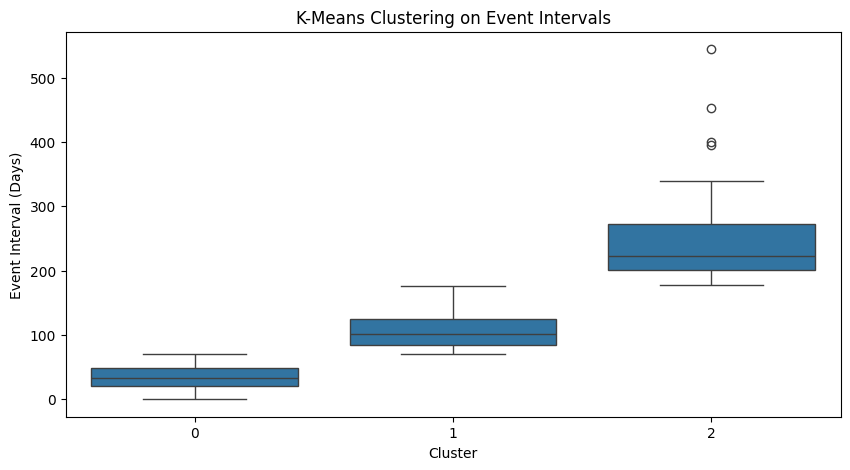

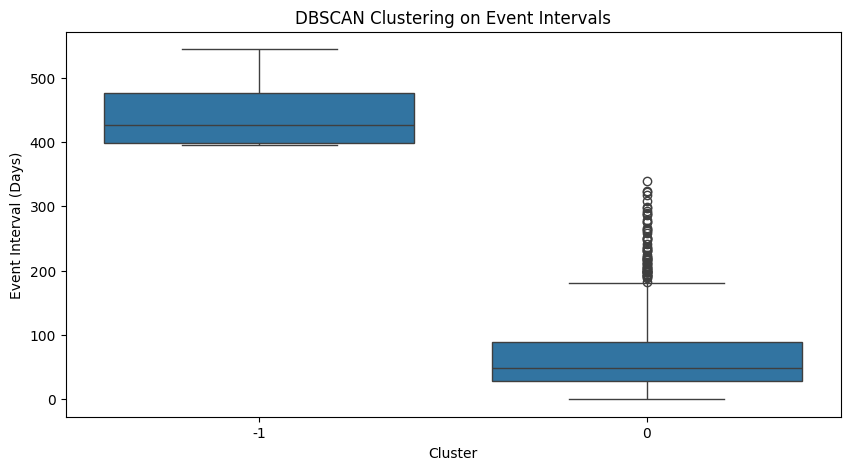

Cluster Distribution for K-Means:
KMeans_Cluster
0    645
1    265
2     70
Name: count, dtype: int64 

Cluster Distribution for DBSCAN:
DBSCAN_Cluster
 0    976
-1      4
Name: count, dtype: int64 



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
    df = df.dropna(subset=["DATE"])
    return df.sort_values(by=["PATIENT_ID", "DATE"])

# Compute event intervals
def compute_event_intervals(df):
    df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift()
    df["event_interval"] = (df["DATE"] - df["prev_DATE"]).dt.days
    return df.dropna(subset=["event_interval"])

# K-Means Clustering
def apply_kmeans(df, n_clusters=3):
    scaler = StandardScaler()
    X = scaler.fit_transform(df[["event_interval"]])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df["KMeans_Cluster"] = kmeans.fit_predict(X)
    
    return df, kmeans

# DBSCAN Clustering
def apply_dbscan(df, eps=0.5, min_samples=5):
    scaler = StandardScaler()
    X = scaler.fit_transform(df[["event_interval"]])
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df["DBSCAN_Cluster"] = dbscan.fit_predict(X)
    
    return df, dbscan

# Visualization
def plot_clusters(df, cluster_col, title):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[cluster_col], y=df["event_interval"])
    plt.title(title)
    plt.xlabel("Cluster")
    plt.ylabel("Event Interval (Days)")
    plt.show()

# Compare Clustering Results
def compare_clustering(df):
    print("Cluster Distribution for K-Means:")
    print(df["KMeans_Cluster"].value_counts(), "\n")
    
    print("Cluster Distribution for DBSCAN:")
    print(df["DBSCAN_Cluster"].value_counts(), "\n")

# Running the pipeline
file_path = "../data/med_events.csv"
df = load_data(file_path)
df = compute_event_intervals(df)

# Apply Clustering
df, kmeans_model = apply_kmeans(df, n_clusters=3)
df, dbscan_model = apply_dbscan(df, eps=0.5, min_samples=5)

# Visualization
plot_clusters(df, "KMeans_Cluster", "K-Means Clustering on Event Intervals")
plot_clusters(df, "DBSCAN_Cluster", "DBSCAN Clustering on Event Intervals")

# Compare Results
compare_clustering(df)



In [ ]:
Prompts entered in ChatGPT:

"Convert the Sessa Empirical Estimator R code to Python in Jupyter Notebook. Use a dataset from the given source. Apply K-Means, then try another clustering algorithm, compare results, and generate insights."

"Additional Task: Create a callable function in each step. Check if these callable function has the same result (and insights) with your Jupyter Notebook. How do I do this?"